In [5]:
%load_ext autoreload
%autoreload 2
import sys
sys.path.append('..')
import numpy as np
from src.utilities import C_to_Ec, L_to_El

In [21]:
a = 1
b = 5

def ajouter(a,b):
    return a+b

def f(a,b):
    
    if a > b:
        print("a est plus grand que b")
    else:
        print("b est egal ou plus grand que a")

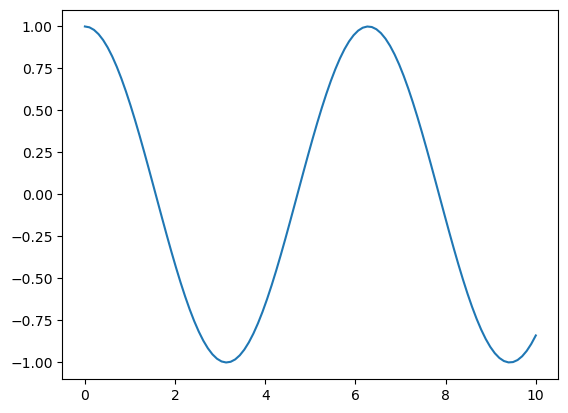

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(0, 10, 100)
y = np.cos(x)

plt.plot(x,y)

In [3]:
import numpy as np
from scipy.integrate import quad

# Definición de la función f(theta)
def f(theta, T, Delta):
    return -Delta * np.sqrt(1 - T * np.sin(theta/2)**2)

# Cálculo numérico de A_0
def A0(T, Delta):
    integral, error = quad(lambda theta: f(theta, T, Delta), 0, np.pi)
    return integral / np.pi

# Cálculo numérico de A_k para k >= 1
def A_k(k, T, Delta):
    integral, error = quad(lambda theta: f(theta, T, Delta) * np.cos(k * theta), 0, np.pi)
    return 2 * integral / np.pi

if __name__ == '__main__':
    # Definir valores numéricos para T y Delta (ajusta según convenga)
    T_val = 0.995      # Ejemplo: T = 0.5
    Delta_val = 10.0  # Ejemplo: Delta = 1.0

    num_coef = 10  # Número de coeficientes a calcular (k = 0, 1, 2, ..., num_coef)

    # Calcular y mostrar A_0
    A0_val = A0(T_val, Delta_val)
    print("A_0 =", A0_val)

    # Calcular y mostrar A_k para k>=1
    for k in range(1, num_coef + 1):
        Ak_val = A_k(k, T_val, Delta_val)
        print("A_{} = {}".format(k, Ak_val))

A_0 = -6.422554567687698
A_1 = -4.1524423602962
A_2 = 0.7863185324004126
A_3 = -0.31447535563598344
A_4 = 0.16140837183190715
A_5 = -0.09419202601809568
A_6 = 0.05945499908422962
A_7 = -0.039568843210689694
A_8 = 0.02735632769565047
A_9 = -0.019463449445218682
A_10 = 0.014161015078745584


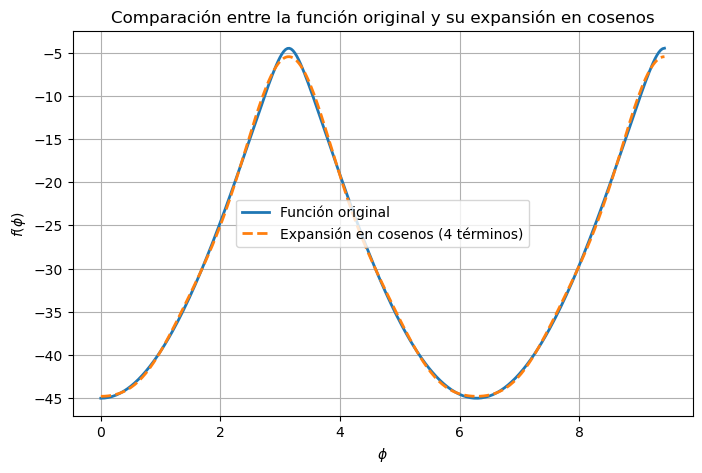

In [72]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

# Parámetros
Delta = 45.0
T = 0.99
phi_ext = 0.
num_coef = 4  # Número de coeficientes A_k a calcular

# Definición de la función original f(phi)
def f(phi, T, Delta, phi_ext):
    return -Delta * np.sqrt(1 - T * np.sin((phi - phi_ext)/2)**2)

# Cálculo numérico de A_0
def A0(T, Delta):
    integral, error = quad(lambda x: f(x, T, Delta, 0), 0, np.pi)
    return integral / np.pi

# Cálculo numérico de A_k para k >= 1
def A_k(k, T, Delta):
    integral, error = quad(lambda x: f(x, T, Delta, 0) * np.cos(k*x), 0, np.pi)
    return 2 * integral / np.pi

# Cálculo de los coeficientes A_k
A_coeffs = [A0(T, Delta)] + [A_k(k, T, Delta) for k in range(1, num_coef + 1)]
A_coeffs = np.array(A_coeffs)
# Función reconstruida a partir de la expansión en cosenos
def f_approx(phi, A_coeffs, phi_ext):
    approx = np.zeros_like(phi)
    for k, Ak in enumerate(A_coeffs):
        approx += Ak * np.cos(k * (phi - phi_ext))
    return approx

# Rango de valores para phi
phi_vals = np.linspace(0, 3*np.pi, 300)

# Evaluación de la función original y la aproximación
f_original_vals = f(phi_vals, T, Delta, phi_ext)
f_approx_vals = f_approx(phi_vals, A_coeffs, phi_ext)

# Graficar la función original y su aproximación
plt.figure(figsize=(8, 5))
plt.plot(phi_vals, f_original_vals, label="Función original", linewidth=2)
plt.plot(phi_vals, f_approx_vals, '--', label=f"Expansión en cosenos ({num_coef} términos)", linewidth=2)
plt.xlabel(r"$\phi$")
plt.ylabel(r"$f(\phi)$")
plt.legend()
plt.title(r"Comparación entre la función original y su expansión en cosenos")
plt.grid()
plt.show()

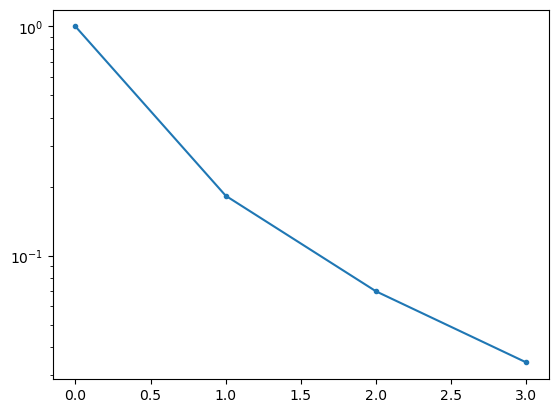

In [73]:
fig,ax = plt.subplots()
ax.plot(np.abs(A_coeffs[1:]/A_coeffs[1]),'.-')
ax.set_yscale('log')
plt.show()

In [87]:
def n_operator(n_cut: int) -> np.ndarray:
    n_vals = np.arange(-n_cut, n_cut + 1)
    return np.diag(n_vals)

def phi_operator(n_cut: int) -> np.ndarray:
    dim = 2 * n_cut + 1
    n_vals = np.arange(-n_cut, n_cut + 1)
    n_mat, m_mat = np.meshgrid(n_vals, n_vals, indexing='ij')
    diff = n_mat - m_mat

    phi_op = np.empty((dim, dim), dtype=complex)
    # Asignar la diagonal
    phi_op[np.diag_indices(dim)] = np.pi
    # Evitar división por cero en off-diagonal
    off_diag = diff != 0
    phi_op[off_diag] = -1j / diff[off_diag]
    return phi_op

In [24]:

N = 250
Lj_a = 5e-9
Cj_b = 0.24e-15
Cj_a = 29e-15
Cg_a = 54e-18
Cg_b = Cg_a
Ct = 2* (Cg_b) + (N - 1) * Cg_a
lambda_factor = (N - 1) * Cg_a / Ct

def s_mu(mu : int):
    return np.sin(np.pi * mu / 2 / N)

def c_mu(mu : int):
    return np.cos(np.pi * mu / 2 / N)

def Ec_mu(mu : int):
    return 1 / (1 / Ec_a + 1 / 4 / Eg_a / s_mu(2*mu)**2)

def g_mu(mu : int):
    return 4 / np.sqrt(2 * N) * Ec_corrected * Ec_mu(mu) / Eg_a * c_mu(2*mu) / s_mu(2*mu)**2

Ej_a = L_to_El(Lj_a)
Ec_a = C_to_Ec(Cj_a)
Ec_b = C_to_Ec(Cj_b)
Eg_a = C_to_Ec(Cg_a)
Eg_b = C_to_Ec(Cg_b)
Ec = 1/(1/Ec_b + 1/N/Ec_a)
Et = C_to_Ec(Ct)
Ec_corrected = 1 / (1 / Ec + 1/4/ Et * (1 - 2 / 3 * (N + 1)/ N * lambda_factor))
Ec_mu_1 = Ec_mu(2)
g = g_mu(2)
g*1e-9
# np.sqrt(8*Ec_mu(2)*Ej_a)*1e-9

3.934050346383435

In [26]:
# 1/2 * (Ej_a /2/Ec_a)**0.25
1/2 * (0.12 /2/12)**0.25

0.13295739742362472

In [3]:
for i in range(1,3):
    print(i)

1
2


In [10]:
N = 2
len(np.arange(-N,N+1/2, 1/2))

9

In [20]:
from src.utilities import sin_kphi_operator, cos_kphi_operator

sin_kphi_operator(1,3,np.pi/2)

array([[ 0. +0.000000e+00j, -0.5-3.061617e-17j,  0. +0.000000e+00j],
       [-0.5+3.061617e-17j,  0. +0.000000e+00j, -0.5-3.061617e-17j],
       [ 0. +0.000000e+00j, -0.5+3.061617e-17j,  0. +0.000000e+00j]])